# Decibels (dB)

It is a logarithmic unit that is used to express the ratio of two values of a physical quantity. 
The decibel is defined as ten times the logarithm to the base 10 of the ratio of two power quantities:

$$ 
\text{dB} = 10 \cdot \log_{10}\left(\frac{P_1}{P_2}\right) 
$$

where $ P_1 $ and $ P_2 $ are the relative powers of the sound {cite:p}`enwiki:1260411874`

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.grid'] = True

## Convert Magnitude to Decibels

**Magnitude** represents the amplitude of a signal directly. As an example, a value of 1 corresponds to "unity gain" (no amplification or attenuation) and corresponds to 0 dB (reference level). Magnitudes smaller than 1 result in negative dB values (attenuation), while magnitudes greater than 1 produce positive dB values (amplification).
The formula to convert a magnitude to decibels is:

$$
\text{dB} = 20 \cdot \log_{10}(\text{magnitude})
$$

In audio, the **Decibel** scale is commonly used to express the relative loudness of sounds. The advantage of using decibels is that they allow us to express a wide range of values in a more compact form. The decibel scale is logarithmic, which means that a small change in decibels corresponds to a large change in magnitude. For example, a 3 dB increase in sound level corresponds to a doubling of the sound intensity.

In [5]:
# Convert decibels to magnitude
db_to_mag = lambda x: 10 ** (x / 20)

# Convert magnitude to decibels
mag_to_db = lambda x: 20 * np.log10(x)

The decibel scale compresses the dynamic range, making it easier to visualize and compare small and large magnitudes. The plot illustrates the relationship between magnitude (linear scale) and decibels (logarithmic scale).

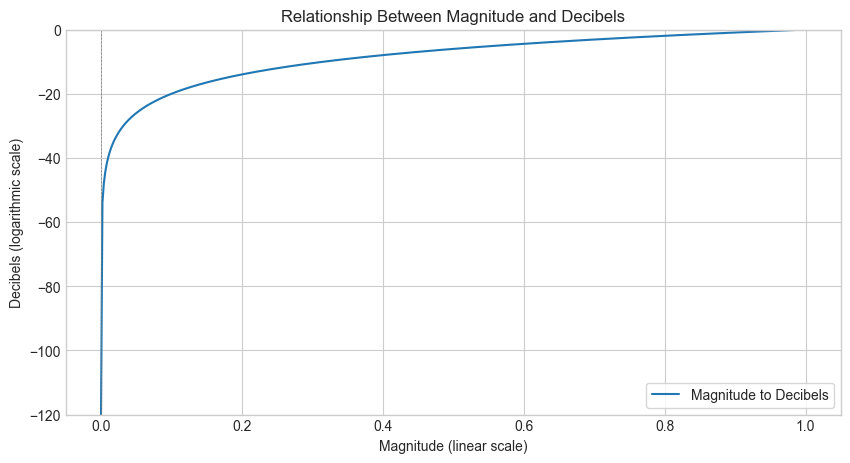

In [18]:
# Generate a range of magnitudes
magnitudes = np.linspace(1e-6, 1, 500)  # Avoid log(0) issues

# Convert magnitudes to decibels
decibels = mag_to_db(magnitudes)

# Plot magnitude vs decibels
plt.figure(figsize=(10, 5))
plt.plot(magnitudes, -np.abs(decibels), label="Magnitude to Decibels")  # Use negative abs value for decibels

# Set x and y axes limits

plt.ylim(-120, 0)  # Limit y to be from -120 dB to 0 dB

# Draw horizontal and vertical lines at the origin
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)

# Labels and legend
plt.title("Relationship Between Magnitude and Decibels")
plt.xlabel("Magnitude (linear scale)")
plt.ylabel("Decibels (logarithmic scale)")

# Customize y-axis ticks to show negative decibels
plt.yticks(np.arange(-120, 1, 20))  # Set ticks from -120 to 0 with a step of 20

plt.legend(frameon=True)
plt.show()


The curve in the plot is steep for very small magnitudes, showing that small changes in magnitude near zero lead to significant changes in dB.
At larger magnitudes, the curve flattens, indicating a more gradual change in dB.

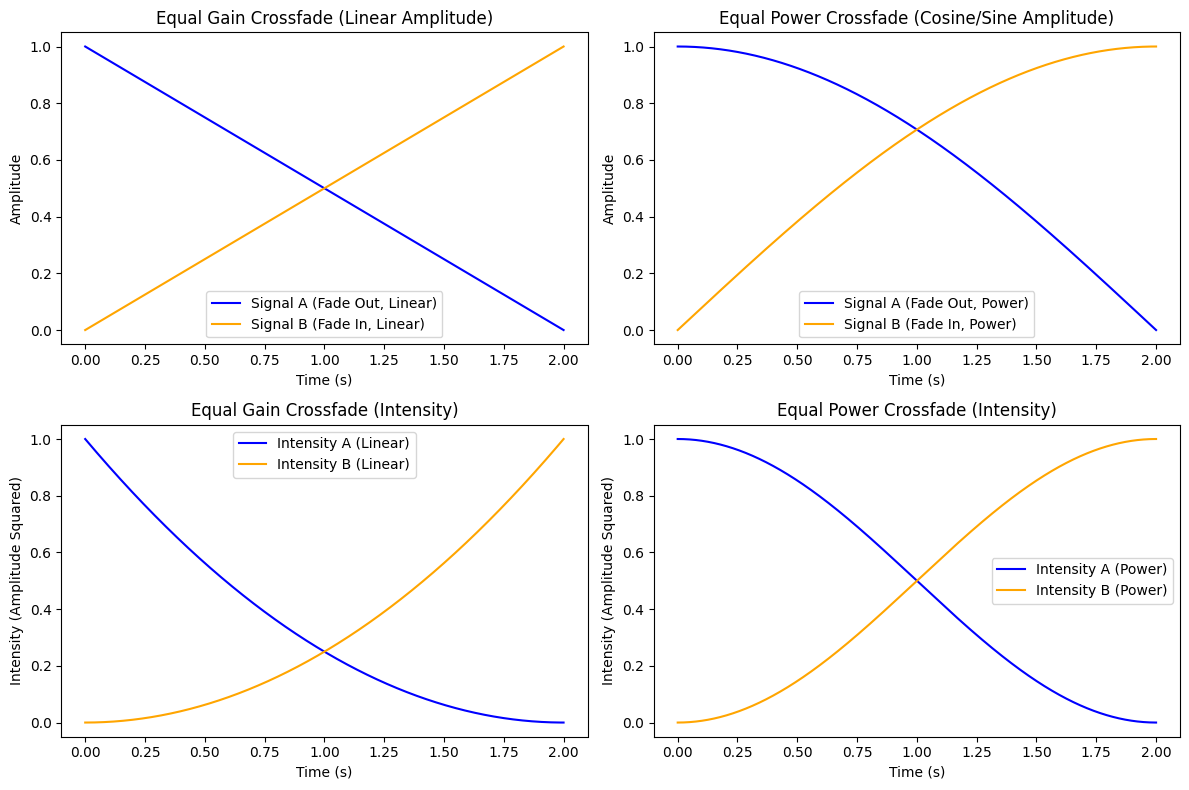

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 2.0  # 2 seconds for crossfade
sampling_rate = 44100  # Standard audio sampling rate
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Equal Gain (Linear) fade envelopes
fade_out_linear = 1 - time / duration  # Signal A fades out
fade_in_linear = time / duration      # Signal B fades in

# Equal Power fade envelopes (Cosine/Sine)
fade_out_power = np.cos(np.pi / 2 * time / duration)  # Signal A fades out
fade_in_power = np.sin(np.pi / 2 * time / duration)   # Signal B fades in

# Plotting
plt.figure(figsize=(12, 8))

# Plot Equal Gain (Linear) Crossfade
plt.subplot(2, 2, 1)
plt.plot(time, fade_out_linear, label="Signal A (Fade Out, Linear)", color='blue')
plt.plot(time, fade_in_linear, label="Signal B (Fade In, Linear)", color='orange')
plt.title("Equal Gain Crossfade (Linear Amplitude)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot Equal Power (Cosine/Sine) Crossfade
plt.subplot(2, 2, 2)
plt.plot(time, fade_out_power, label="Signal A (Fade Out, Power)", color='blue')
plt.plot(time, fade_in_power, label="Signal B (Fade In, Power)", color='orange')
plt.title("Equal Power Crossfade (Cosine/Sine Amplitude)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot intensity for Equal Gain Crossfade
intensity_out_linear = fade_out_linear**2
intensity_in_linear = fade_in_linear**2

plt.subplot(2, 2, 3)
plt.plot(time, intensity_out_linear, label="Intensity A (Linear)", color='blue')
plt.plot(time, intensity_in_linear, label="Intensity B (Linear)", color='orange')
plt.title("Equal Gain Crossfade (Intensity)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (Amplitude Squared)")
plt.legend()

# Plot intensity for Equal Power Crossfade
intensity_out_power = fade_out_power**2
intensity_in_power = fade_in_power**2

plt.subplot(2, 2, 4)
plt.plot(time, intensity_out_power, label="Intensity A (Power)", color='blue')
plt.plot(time, intensity_in_power, label="Intensity B (Power)", color='orange')
plt.title("Equal Power Crossfade (Intensity)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (Amplitude Squared)")
plt.legend()

plt.tight_layout()
plt.show()



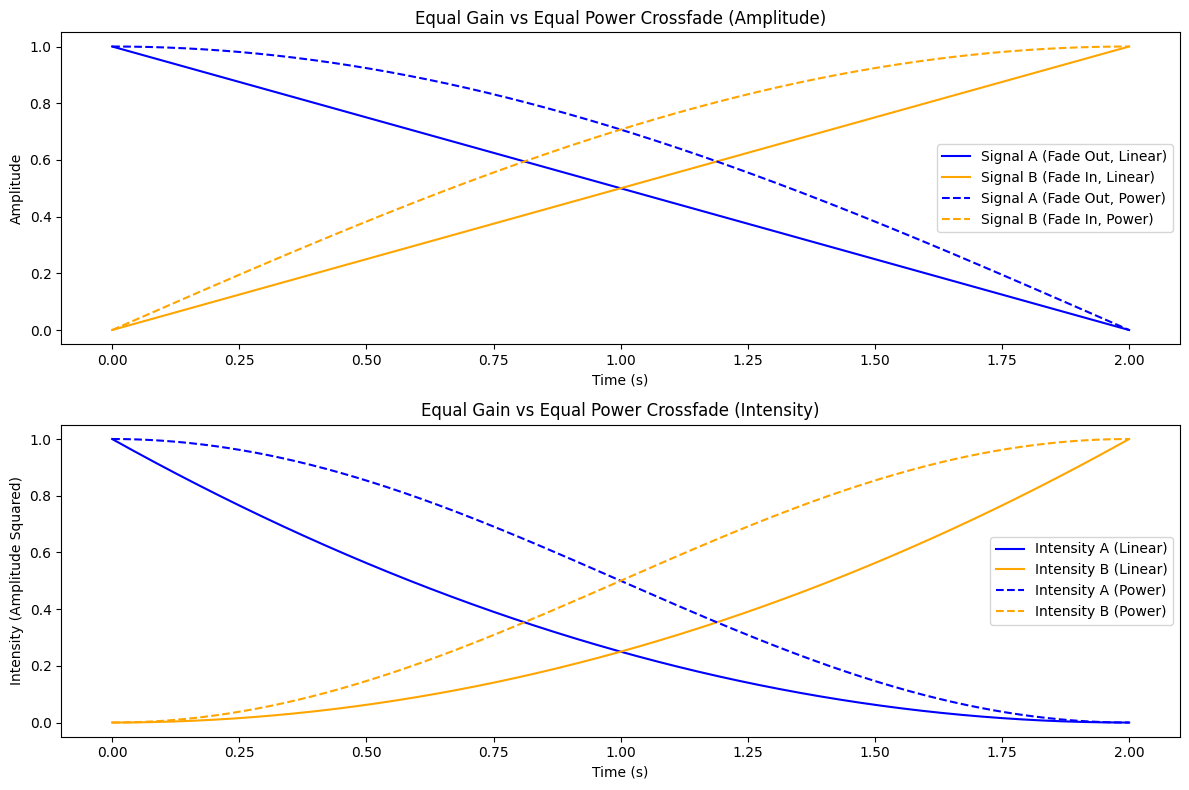

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 2.0  # 2 seconds for crossfade
sampling_rate = 44100  # Standard audio sampling rate
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Equal Gain (Linear) fade envelopes
fade_out_linear = 1 - time / duration  # Signal A fades out
fade_in_linear = time / duration      # Signal B fades in

# Equal Power fade envelopes (Cosine/Sine)
fade_out_power = np.cos(np.pi / 2 * time / duration)  # Signal A fades out
fade_in_power = np.sin(np.pi / 2 * time / duration)   # Signal B fades in

# Plotting
plt.figure(figsize=(12, 8))

# Plot Equal Gain (Linear) and Equal Power (Cosine/Sine) Crossfade Envelopes (Amplitude)
plt.subplot(2, 1, 1)
plt.plot(time, fade_out_linear, label="Signal A (Fade Out, Linear)", color='blue')
plt.plot(time, fade_in_linear, label="Signal B (Fade In, Linear)", color='orange')
plt.plot(time, fade_out_power, label="Signal A (Fade Out, Power)", linestyle='--', color='blue')
plt.plot(time, fade_in_power, label="Signal B (Fade In, Power)", linestyle='--', color='orange')
plt.title("Equal Gain vs Equal Power Crossfade (Amplitude)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# Plot Intensities for Equal Gain and Equal Power
intensity_out_linear = fade_out_linear**2
intensity_in_linear = fade_in_linear**2
intensity_out_power = fade_out_power**2
intensity_in_power = fade_in_power**2

plt.subplot(2, 1, 2)
plt.plot(time, intensity_out_linear, label="Intensity A (Linear)", color='blue')
plt.plot(time, intensity_in_linear, label="Intensity B (Linear)", color='orange')
plt.plot(time, intensity_out_power, label="Intensity A (Power)", linestyle='--', color='blue')
plt.plot(time, intensity_in_power, label="Intensity B (Power)", linestyle='--', color='orange')
plt.title("Equal Gain vs Equal Power Crossfade (Intensity)")
plt.xlabel("Time (s)")
plt.ylabel("Intensity (Amplitude Squared)")
plt.legend()

plt.tight_layout()
plt.show()
